In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
file={
#     "oi_a0_(4)": ["3gram_ordered_inbound_alpha0.0_1to5_mpht"],
    "oi_a0.01_(4)": ["3gram_ordered_inbound_alpha0.01_1to5_mpht"],
    "oi_a0.1_(4)": ["3gram_ordered_inbound_alpha0.1_1to5_mpht"],
    "oi_a0.25_(4)": ["3gram_ordered_inbound_alpha0.25_1to5_mpht"],
    "oi_a0.5_(4)": ["3gram_ordered_inbound_alpha0.5_1to5_mpht"],

    "oi_a0.1_(40)": ['3gram_ordered_inbound_alpha0.1_1to5_mega_text'],
    "oi_a0.1_(50)": ["3gram_ordered_inbound_alpha0.1_1to5_train(mega_text_50)_test(mega_text_50)"],
    
    
    "ri_a0_(4)": ["3gram_random_inbound_alpha0.0_1to5_mpht"],
    "ri_a0.01_(4)": ["3gram_random_inbound_alpha0.01_1to5_mpht"],
    "ri_a0.1_(4)": ["3gram_random_inbound_alpha0.1_1to5_mpht"],
    "ri_a0.25_(4)": ["3gram_random_inbound_alpha0.25_1to5_mpht"],
    "ri_a0.5_(4)": ["3gram_random_inbound_alpha0.5_1to5_mpht"],
    
    "ot_ow_i_a0.01_(4)": ["3gram_ordered_text_ordered_window_inbound_alpha0.01_1to5_mpht"],
    "ot_ow_i_a0.1_(4)": ["3gram_ordered_text_ordered_window_inbound_alpha0.1_1to5_mpht"],
    "ot_rw_i_a0.01_(4)": ["3gram_ordered_text_random_window_inbound_alpha0.01_1to5_mpht"],
    "ot_rw_i_a0.1_(4)": ["3gram_ordered_text_random_window_inbound_alpha0.1_1to5_mpht"],
    
    "ot_rw_i_a0.1_(40)": ['3gram_ordered_text_random_window_inbound_alpha0.1_1to5_mega_text_40'],
    
    "rt_ow_i_a0.01_(4)": ["3gram_random_text_ordered_window_inbound_alpha0.01_1to5_mpht"],
    "rt_ow_i_a0.1_(4)": ["3gram_random_text_ordered_window_inbound_alpha0.1_1to5_mpht"],
    "rt_rw_i_a0.01_(4)": ["3gram_random_text_random_window_inbound_alpha0.01_1to5_mpht"],
    "rt_rw_i_a0.1_(4)": ["3gram_random_text_random_window_inbound_alpha0.1_1to5_mpht"],
    
    "oi_a0.1_train(90)_test(10)": ['3gram_ordered_inbound_alpha0.1_1to5_train(mega_text_90)_test(mega_text_10)'],
#     "oo_a0.1_train(90)_test(10)": ['3gram_ordered_outbound_alpha0.1_1to5_train(mega_text_90)_test(mega_text_10)'],
#     "ri_a0.1_train(90)_test(10)": ['3gram_random_inbound_alpha0.1_1to5_train(mega_text_90)_test(mega_text_10)'],
    
    "oi_a0.1_90_10_CHINESE": ["3gram_ordered_inbound_alpha0.1_1to5_90_10_CHINESE"],
    "ri_a0.1_90_10_CHINESE": ["3gram_random_inbound_alpha0.1_1to5_90_10_CHINESE"],
    "oi_a0.1_90_10_TURKISH": ["3gram_ordered_inbound_alpha0.1_1to5_90_10_TURKISH"],
    "ri_a0.1_90_10_TURKISH": ["3gram_random_inbound_alpha0.1_1to5_90_10_TURKISH"],
    
#     "ri_a0.1_train(10)_test(pride_and_prejudice)": ["3gram_random_inbound_alpha0.1_1to5_train(mega_text_10)_pride_and_prejudice"],
    
    "oi_a0.1_90_10": ["3gram_ordered_inbound_alpha0.1_1to5_train(90)_test(10)"],
    "ri_a0.1_90_10": ['3gram_random_alpha0.1_1to5_train(90)_test(10)']
}

df_all = pd.DataFrame(columns=['name','window_size', 'word_count', 'prob_words', 'perplexity','h_words', 'h_wordset', 'h_wordorder', 'entropy_rate', 'unordered_entropy_rate', 'entropy_rate_difference','perplexity'])
c = 0
for k,v in file.items():
    df = pd.read_csv(file[k][0])
    if k[len(k)-2:len(k)-1] == str(4):
        df['word_count'] = pd.Series([576673,576673,576673,576673,576673])
    elif k[len(k)-3:len(k)-1] == str(10):
        df['word_count'] = pd.Series([1313930,1313930,1313930,1313930,1313930])
    elif k[len(k)-3:len(k)-1] == str(50):
        df['word_count'] = pd.Series([6407228,6407228,6407228,6407228,6407228])
    else:
        df['word_count'] = pd.Series([0,0,0,0,0])
    
    df['prob_words'] = pd.Series(2**(-df['h_words']))
    df['window_size'] =  pd.Series([1,2,3,4,5])
    df['name'] = pd.Series([k,k,k,k,k])
    df['h_wordorder'] = pd.Series(df['h_words'] - df['h_wordset'])
    df['entropy_rate'] = pd.Series(df['h_words'] / df['window_size'])
    df['perplexity'] = pd.Series(2**df['entropy_rate'])
    df['unordered_entropy_rate'] = pd.Series(df['h_wordset'] / df['window_size'])
    df['entropy_rate_difference'] = pd.Series((df['h_words'] - df['h_wordset']) / df['window_size'])
#     df['perplexity'] = pd.Series(df['prob_words']**(-1/df['word_count']))
    del df['Unnamed: 0']
    for i in range(5):
        df_all.loc[5*c + i] = df.loc[i]
#     if c == 0:
#         print(df)
    c+=1

# df_all[df_all['name'] == ('oi_a0.1')]
df_all


,name,window_size,word_count,prob_words,perplexity,h_words,h_wordset,h_wordorder,entropy_rate,unordered_entropy_rate,entropy_rate_difference,perplexity
0,oi_a0.01_(4),1,576673,1.136221e-03,880.110097,9.781540,9.781540,0.000000,9.781540,9.781540,0.000000,880.110097
1,oi_a0.01_(4),2,576673,1.820271e-03,23.438615,9.101631,8.851435,0.250196,4.550815,4.425717,0.125098,23.438615
2,oi_a0.01_(4),3,576673,3.354376e-04,14.392275,11.541668,11.431501,0.110167,3.847223,3.810500,0.036722,14.392275
3,oi_a0.01_(4),4,576673,6.089235e-05,11.320336,14.003379,13.860135,0.143244,3.500845,3.465034,0.035811,11.320336
4,oi_a0.01_(4),5,576673,1.125234e-05,9.766780,16.439415,16.206280,0.233135,3.287883,3.241256,0.046627,9.766780
...,...,...,...,...,...,...,...,...,...,...,...,...
130,ri_a0.1_90_10,1,0,8.936309e-03,111.903019,6.806105,6.806105,0.000000,6.806105,6.806105,0.000000,111.903019
131,ri_a0.1_90_10,2,0,3.919123e-05,159.737002,14.639109,13.436792,1.202317,7.319555,6.718396,0.601159,159.737002
132,ri_a0.1_90_10,3,0,2.457382e-08,343.960945,25.278303,20.953443,4.324860,8.426101,6.984481,1.441620,343.960945
133,ri_a0.1_90_10,4,0,1.489989e-11,508.984132,35.965907,28.611139,7.354768,8.991477,7.152785,1.838692,508.984132


In [3]:
file={
    "oi_a0_(4)",    "ri_a0_(4)",
    "oi_a0.01_(4)", "ri_a0.01_(4)",  "ot_ow_i_a0.01_(4)",  "ot_rw_i_a0.01_(4)",  "rt_ow_i_a0.01_(4)",   "rt_rw_i_a0.01_(4)",
    "oi_a0.1_(4)",  "ri_a0.1_(4)",   "ot_ow_i_a0.1_(4)",   "ot_rw_i_a0.1_(4)",   "rt_ow_i_a0.1_(4)",    "rt_rw_i_a0.1_(4)",
    "oi_a0.1_(40)", 
    "oi_a0.25_(4)", "ri_a0.25_(4)",
    "oi_a0.5_(4)",  "ri_a0.5_(4)",
    
    "oi_a0.1_train(90)_test(10)",
    "oo_a0.1_train(90)_test(10)",
    "ri_a0.1_train(10)_test(pride_and_prejudice)",
    "ri_a0.1_train(90)_test(10)",
    
    "oi_a0.1_(40)", 
    "oi_a0.1_(50)",
    "ot_rw_i_a0.1_(40)",

}

[]

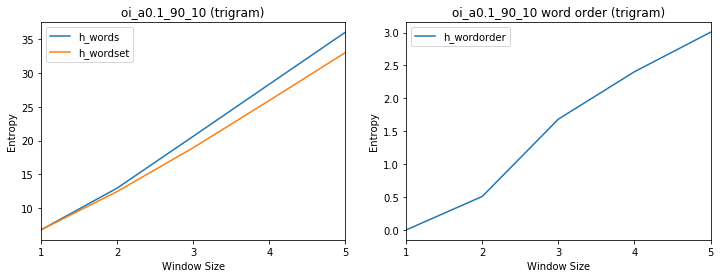

In [27]:
# Compare h_words/h_wordset and word order

name = 'oi_a0.1_90_10'
# name = "oi_a0.1_90_10_TURKISH"
df = df_all[df_all['name'] == name].copy()

fig, ax = plt.subplots(ncols=2,figsize=(12,4))
axis = df.plot(x="window_size", y=["h_words", "h_wordset"], title=name+" (trigram)", ax=ax[0])
axis.set(xlabel="Window Size", ylabel="Entropy")
axis.set_xticks(range(1,6,1))

axis = df.plot(x="window_size", y=['h_wordorder'], title=name+" word order (trigram)", ax=ax[1])
axis.set(xlabel="Window Size", ylabel="Entropy")
axis.set_xticks(range(1,6,1))

plt.plot()

[]

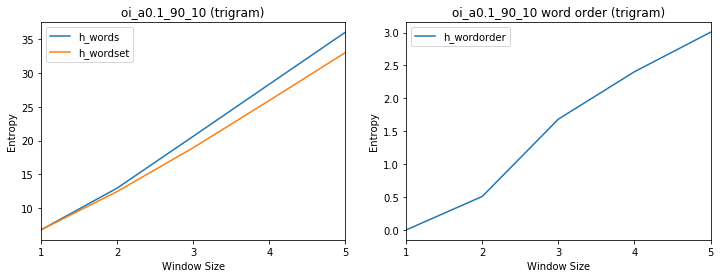

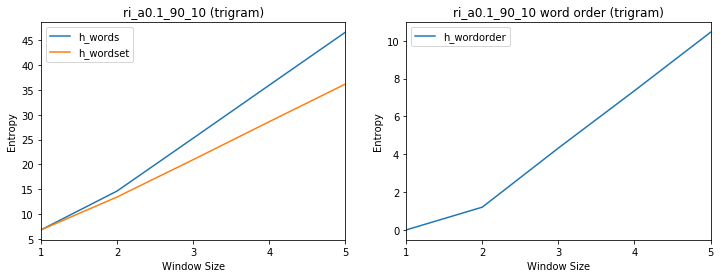

In [26]:
# Compare h_words/h_wordset and word order
name = "oi_a0.1_90_10"
# name = "oi_a0.1_90_10_TURKISH"
df = df_all[df_all['name'] == name].copy()

fig, ax = plt.subplots(ncols=2,figsize=(12,4))
axis = df.plot(x="window_size", y=["h_words", "h_wordset"], title=name+" (trigram)", ax=ax[0])
axis.set(xlabel="Window Size", ylabel="Entropy")
axis.set_xticks(range(1,6,1))

axis = df.plot(x="window_size", y=['h_wordorder'], title=name+" word order (trigram)", ax=ax[1])
axis.set(xlabel="Window Size", ylabel="Entropy")
axis.set_xticks(range(1,6,1))

plt.plot()

name = "ri_a0.1_90_10"
# name = "ri_a0.1_90_10_TURKISH"

df = df_all[df_all['name'] == name].copy()

fig, ax = plt.subplots(ncols=2,figsize=(12,4))
axis = df.plot(x="window_size", y=["h_words", "h_wordset"], title=name+" (trigram)", ax=ax[0])
axis.set(xlabel="Window Size", ylabel="Entropy")
axis.set_xticks(range(1,6,1))

axis = df.plot(x="window_size", y=['h_wordorder'], title=name+" word order (trigram)", ax=ax[1])
axis.set(xlabel="Window Size", ylabel="Entropy")
axis.set_xticks(range(1,6,1))

plt.plot()

[]

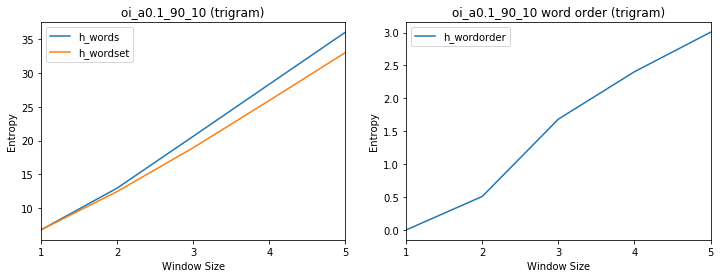

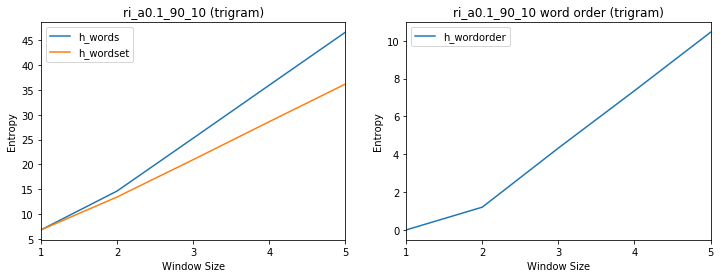

In [25]:
# Compare ordered and random h_words/h_wordset and wordorder

base = 'i_a0.1_90_10'

name = 'o'+base
df = df_all[df_all['name'] == name].copy()

fig, ax = plt.subplots(ncols=2,figsize=(12,4))
axis = df.plot(x="window_size", y=["h_words", "h_wordset"], title=name+" (trigram)", ax=ax[0])
axis.set(xlabel="Window Size", ylabel="Entropy")
axis.set_xticks(range(1,6,1))

axis = df.plot(x="window_size", y=['h_wordorder'], title=name+" word order (trigram)", ax=ax[1])
axis.set(xlabel="Window Size", ylabel="Entropy")
axis.set_xticks(range(1,6,1))

plt.plot()

name = 'r'+base
df = df_all[df_all['name'] == name].copy()

fig, ax = plt.subplots(ncols=2,figsize=(12,4))
axis = df.plot(x="window_size", y=["h_words", "h_wordset"], title=str(name)+" (trigram)", ax=ax[0])
axis.set(xlabel="Window Size", ylabel="Entropy")
axis.set_xticks(range(1,6,1))

axis = df.plot(x="window_size", y=['h_wordorder'], title=name+" word order (trigram)", ax=ax[1])
axis.set(xlabel="Window Size", ylabel="Entropy")
axis.set_xticks(range(1,6,1))

plt.plot()

[]

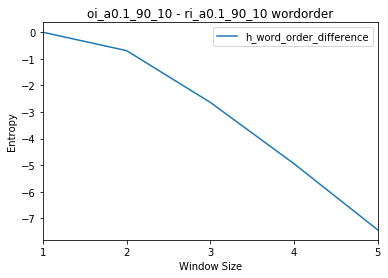

In [23]:
# Compare ordered and random wordorder difference

base = 'i_a0.1_90_10'
df = pd.DataFrame()
df['window_size'] = [1,2,3,4,5]
name1 = 'o'+base
df1 = df_all[df_all['name'] == name1].copy().reset_index(drop=True)

name2 = 'r'+base
df2 = df_all[df_all['name'] == name2].copy().reset_index(drop=True)

# df['h_word_order_difference'] = df2['h_wordorder'] - df1['h_wordorder']
df['h_word_order_difference'] = df1['h_wordorder'] - df2['h_wordorder']

# axis = df.plot(x="window_size", y=['h_word_order_difference'], title=name2 + " - " + name1 +" wordorder")
axis = df.plot(x="window_size", y=['h_word_order_difference'], title=name1 + " - " + name2 +" wordorder")
axis.set(xlabel="Window Size", ylabel="Entropy")
axis.set_xticks(range(1,6,1))

plt.plot()

[]

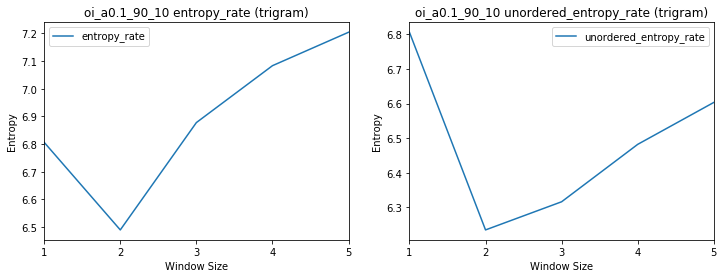

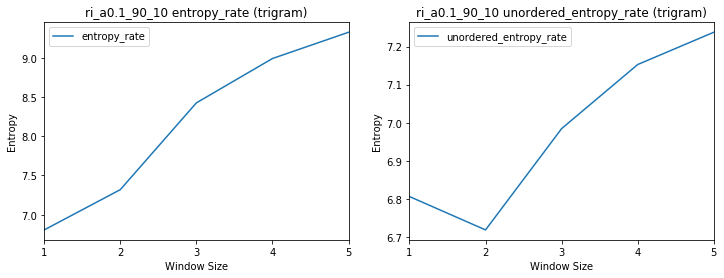

In [22]:
# Compare ordered and unordered entropy rates for random and ordered LM
# as window_size increases, on average there is more entropy per word (LESS INFORMATION)

base = 'i_a0.1_90_10'

name = 'o'+base
# name = "oi_a0.1_90_10"
df = df_all[df_all['name'] == name].copy()

fig, ax = plt.subplots(ncols=2,figsize=(12,4))
axis = df.plot(x="window_size", y=["entropy_rate"], title=name+" entropy_rate (trigram)", ax=ax[0])
axis.set(xlabel="Window Size", ylabel="Entropy")
axis.set_xticks(range(1,6,1))

axis = df.plot(x="window_size", y=['unordered_entropy_rate'], title=name+" unordered_entropy_rate (trigram)", ax=ax[1])
axis.set(xlabel="Window Size", ylabel="Entropy")
axis.set_xticks(range(1,6,1))

plt.plot()

name = 'r'+base
df = df_all[df_all['name'] == name].copy()

fig, ax = plt.subplots(ncols=2,figsize=(12,4))
axis = df.plot(x="window_size", y=["entropy_rate"], title=name+" entropy_rate (trigram)", ax=ax[0])
axis.set(xlabel="Window Size", ylabel="Entropy")
axis.set_xticks(range(1,6,1))

axis = df.plot(x="window_size", y=['unordered_entropy_rate'], title=name+" unordered_entropy_rate (trigram)", ax=ax[1])
axis.set(xlabel="Window Size", ylabel="Entropy")
axis.set_xticks(range(1,6,1))

plt.plot()

[]

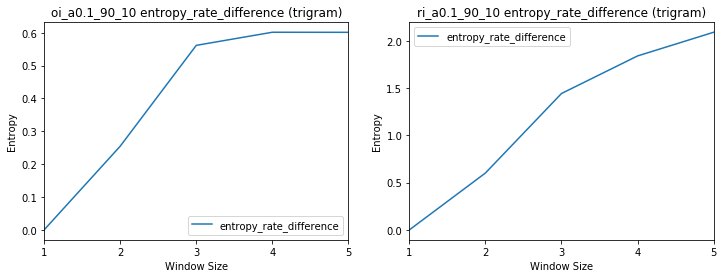

In [21]:
# Compare ordered and unordered entropy rates for random and ordered LM

base = 'i_a0.1_90_10'

name = 'o'+base
name = "oi_a0.1_90_10"
df = df_all[df_all['name'] == name].copy()

name2 = 'r'+base
df2 = df_all[df_all['name'] == name2].copy()

fig, ax = plt.subplots(ncols=2,figsize=(12,4))
axis = df.plot(x="window_size", y=["entropy_rate_difference"], title=name+" entropy_rate_difference (trigram)", ax=ax[0])
axis.set(xlabel="Window Size", ylabel="Entropy")
axis.set_xticks(range(1,6,1))

axis = df2.plot(x="window_size", y=['entropy_rate_difference'], title=name2+" entropy_rate_difference (trigram)", ax=ax[1])
axis.set(xlabel="Window Size", ylabel="Entropy")
axis.set_xticks(range(1,6,1))

plt.plot()


[]

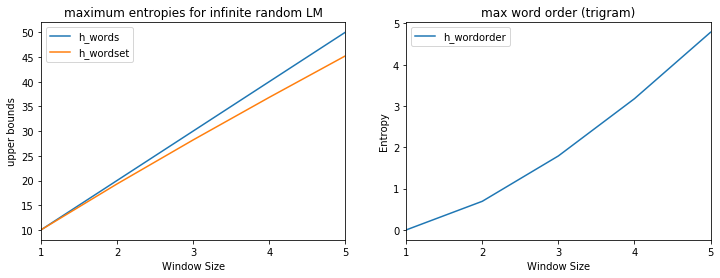

In [11]:
# Get entropy upper bounds given an infinite random LM

import scipy.special

df = pd.DataFrame()
df['window_size'] = [1,2,3,4,5]
df['upper_bounds'] = [0, 1, 2.584962500721156, 4.584962500721156,  6.906890595608519]
# df['h_words'] = 9.781669 * df['window_size'] 
df['h_words'] = 10.001012 * df['window_size'] 
df['h_wordset'] = df['h_words'] - np.log(scipy.special.factorial(df['window_size']))
df['exponential'] = [1,2,6,24,120]
df['h_wordorder'] = df["h_words"] - df['h_wordset']

fig, ax = plt.subplots(ncols=2,figsize=(12,4))

a = df.plot(x="window_size", y=['h_words', 'h_wordset'], title="maximum entropies for infinite random LM", ax=ax[0])
a.set(xlabel="Window Size", ylabel="upper bounds")
a.set_xticks(range(1,6,1))

axis = df.plot(x="window_size", y=['h_wordorder'], title="max word order (trigram)", ax=ax[1])
axis.set(xlabel="Window Size", ylabel="Entropy")
axis.set_xticks(range(1,6,1))

plt.plot()

[]

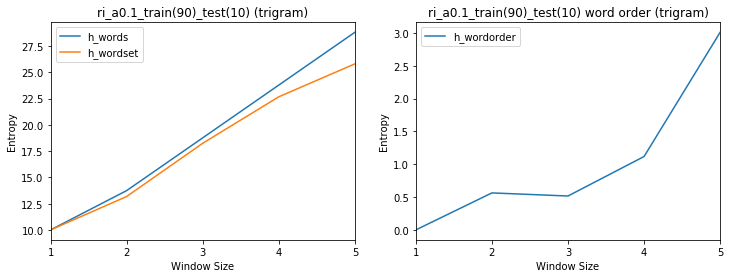

In [10]:
base = 'i_a0.1_train(90)_test(10)'

name = 'r'+base
df = df_all[df_all['name'] == name].copy()

fig, ax = plt.subplots(ncols=2,figsize=(12,4))
axis = df.plot(x="window_size", y=["h_words", "h_wordset"], title=name+" (trigram)", ax=ax[0])
axis.set(xlabel="Window Size", ylabel="Entropy")
axis.set_xticks(range(1,6,1))

axis = df.plot(x="window_size", y=['h_wordorder'], title=name+" word order (trigram)", ax=ax[1])
axis.set(xlabel="Window Size", ylabel="Entropy")
axis.set_xticks(range(1,6,1))

plt.plot()